# Project Final Report 

In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.rows = 6)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [4]:
players_data <-read_csv("https://raw.githubusercontent.com/amberer60s/DSCI-100---Group-Project/refs/heads/main/players%20(1).csv?token=GHSAT0AAAAAADALMD35PYWS7Z6V4NCTVKLQZ7NXHMQ")
print(players_data)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


# A tibble: 196 × 7
   experience subscribe hashedEmail              played_hours name  gender   Age
   <chr>      <lgl>     <chr>                           <dbl> <chr> <chr>  <dbl>
 1 Pro        TRUE      f6daba428a5e19a3d475748…         30.3 Morg… Male       9
 2 Veteran    TRUE      f3c813577c458ba0dfef809…          3.8 Chri… Male      17
 3 Veteran    FALSE     b674dd7ee0d24096d1c0196…          0   Blake Male      17
 4 Amateur    TRUE      23fe711e0e3b77f1da7aa22…          0.7 Flora Female    21
 5 Regular    TRUE      7dc01f10bf20671ecfccdac…          0.1 Kylie Male      21
 6 Amateur    TRUE      f58aad5996a435f16b0284a…          0   Adri… Female    17
 7 Regular    TRUE      8e594b8953193b26f498db9…          0   Luna  Female    19
 8 Amateur    FALSE     1d2371d8a35c8831034b25b…          0   Emer… Male      21
 9 Amateur    TRUE      8b71f4d66a38389b7528bb3…          0.1 Nata… Male      17
10 Veteran    TRUE      bbe2d83de678f519c4b3daa…          0   Nyla  Female    22
# ℹ 186 

## Introduction ##

In the world of gaming, game developers and companies want to keep players engaged and attract new ones. One way to do this is by figuring out which players are most likely to play a lot, as this gives them a better idea of where to focus their marketing and recruitment efforts. The more time a player spends, the better the developers can understand how to improve the game and 

A big question for game developers is whether certain types of players are more likely to play for longer periods. 

For our project, we tried to answer the question : 

**"Can a player’s experience and age predict how much time they will spend playing the game?"**

Our aim is to see if there is a relationship between how old a player is and how much they play. This could help game developers understand which age groups are more likely to be active players.

#### **players.csv**
This dataset contains 196 player records with various variables describing their characteristics and behavior.

| Column Name   | Data Type | Description |
|--------------|----------|-------------|
| `experience` | character (chr) | Player's experience level (`Pro`, `Veteran`, `Regular`, and `Amateur`). |
| `subscribe`  | logical (lgl) | Indicates whether the player is a subscriber to the server (`True` or `False`). |
| `hashedEmail` | character (chr) | Hashed representation of the player's email. |
| `played_hours` | dbl | Total hours the player has played. |
| `name` | character (chr) | Player's name. |
| `gender` | character (chr) | Player's gender (e.g., Male, Female, Non-binary, etc.). |
| `Age` | double (dbl) | Player’s age (years). |

For our exploration in this project, we will focus mainly on the columns **experience**, **Age**, and **played_hours**. Based on this, we can draw the conclusions, 
- **Response Variable** : What we want to predict. In this case, the response variable is **played_hours**, which represennts the total time a players spends playing the game.
- **Exploratory Variable** : What we use to predict the response variable. For our project, the explanatory variables are **experience** and **Age**, as we are looking to see if a player's age can help predict how manny hours they will play. 

## Explortary and Visualization

Using summary function and is.na argument, we can check if there's any NA value in our dataset could interfere our calculations.

In [6]:
summary_players <- players_data |>
                    summarize(across(everything(), ~sum(is.na(.))))
summary_players

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<int>,<int>,<int>,<int>,<int>,<int>,<int>
0,0,0,0,0,0,2


In the next step, we use functions like nrow and group_by to the dataset to find the number and percentage distribution of each experience level.Then summarize and across function can help us to summarize statistics in every column.

In [7]:
num_obs <- nrow(players_data)
players_data |>
  group_by(experience) |>
  summarize(
    count = n(),
    percentage = n() / num_obs * 100
  )

#reports the number of observations in each variable
num_observations <- players_data |>
  summarise(across(everything(), ~sum(!is.na(.))))
num_observations

experience,count,percentage
<chr>,<int>,<dbl>
Amateur,63,32.142857
Beginner,35,17.857143
Pro,14,7.142857
Regular,36,18.367347
Veteran,48,24.489796


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<int>,<int>,<int>,<int>,<int>,<int>,<int>
196,196,196,196,196,196,194


Here since we're using experience as one predictor, we want to scale the experience level from 0 to 5, corresponding with "Beiginner","Regular","Amateur","Pro", and "Veteran". Therefore, we can apply recode function to make the experience from chr to dbl. In addition, using drop_na can help us to eliminate potential NA value that we don't want.

In [31]:
players_d <- players_data|>
            mutate(experience_numeric = recode(experience,
                                      "Beginner" = 1,
                                      "Regular" = 2,
                                      "Amateur" = 3,
                                      "Pro" = 4,
                                      "Veteran" = 5))|>
            drop_na()


Here we can use select function to select only columns we will use in the following steps, making our data frame clearer.

In [34]:
players_data <- players_d |>
                select(experience_numeric, Age, played_hours)

players_data |>
head(6)

experience_numeric,Age,played_hours
<dbl>,<dbl>,<dbl>
4,9,30.3
5,17,3.8
5,17,0.0
3,21,0.7
2,21,0.1
3,17,0.0


For visulization, 

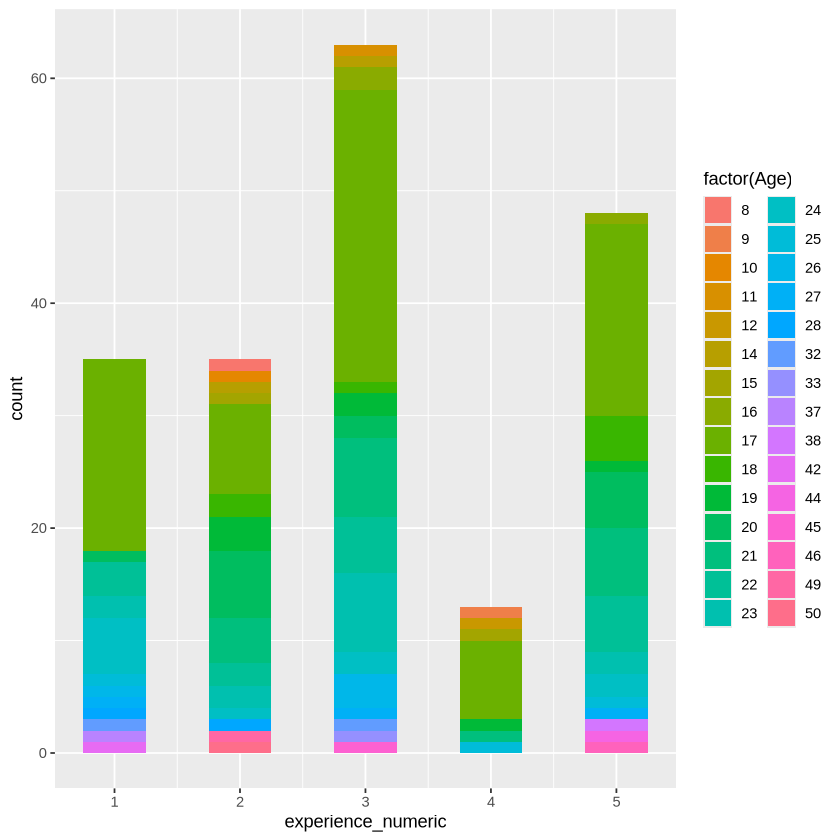

In [59]:
players_graph <- players_data |>
    ggplot(aes(x=experience_numeric,fill = factor(Age))) +
    geom_histogram(binwidth=0.5) 


players_graph

In [ ]:
players_graph <- players_data |>
    ggplot(aes(x=experience_numeric,y=played_hours,color=Age)) +
    geom_point(alpha=0.4)+
    theme(text = element_text(size = 12))


players_graph